#### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
import seaborn as sns
sns.set_theme(style='darkgrid',palette='viridis')
%matplotlib inline

In [2]:
df = pd.read_csv('Wholesale customers data.csv')
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
df.drop(columns=['Channel', 'Region'], inplace=True) #Because they are dicreate columns
df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [4]:
df.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


<Axes: >

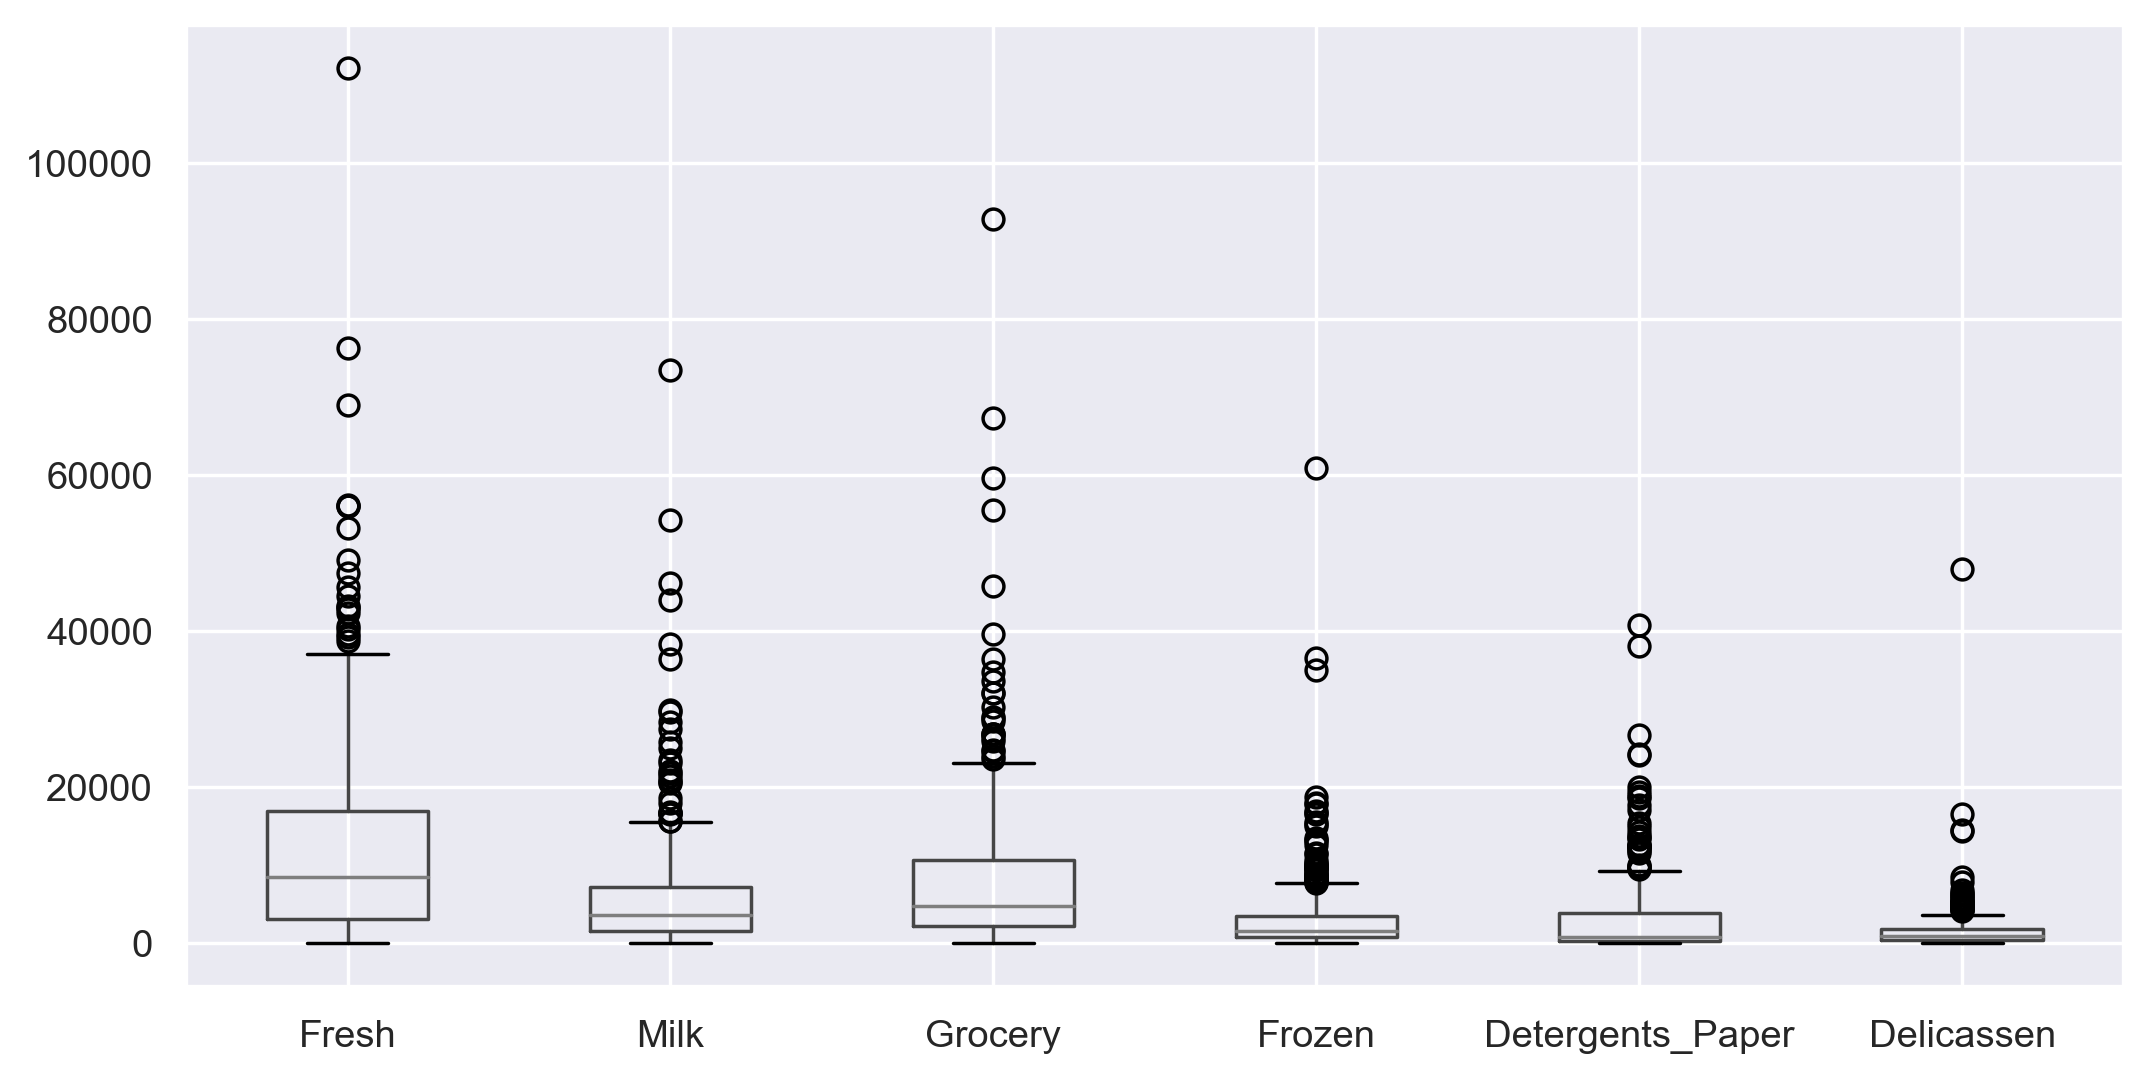

In [5]:
df.boxplot()
#Every Single Column has Outliers

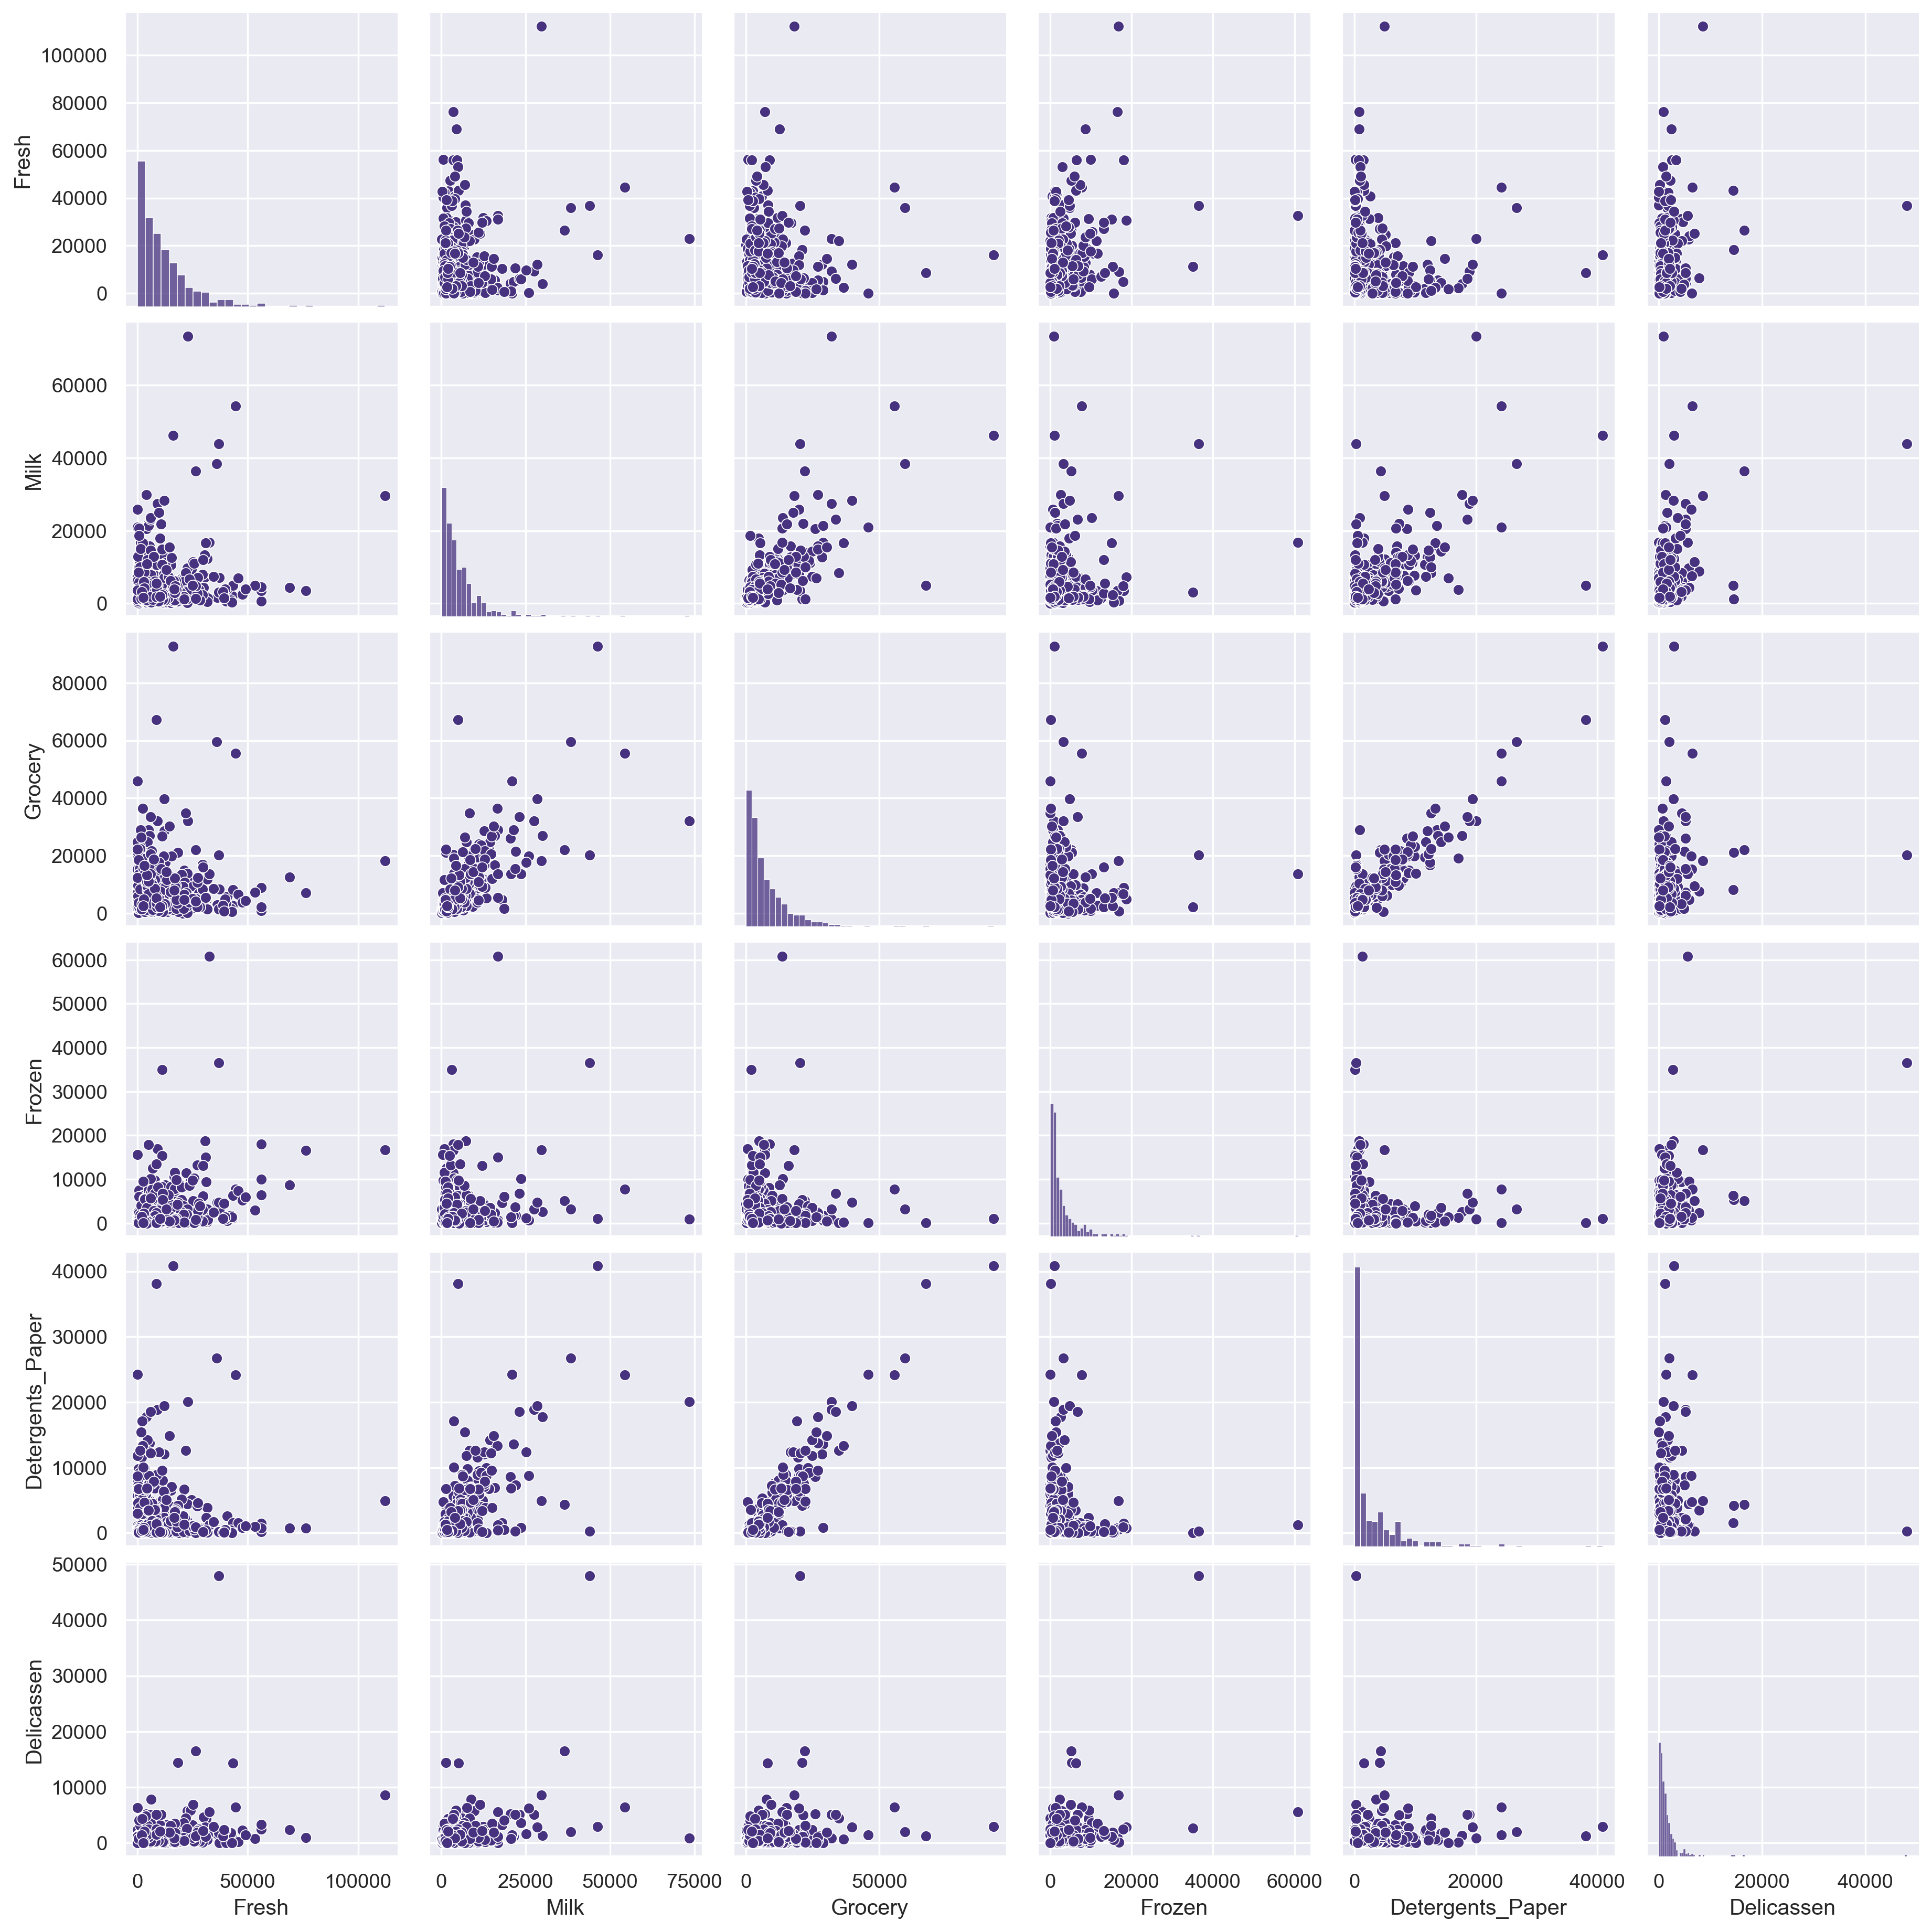

In [6]:
sns.pairplot(df)

#### Standardization

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
sc = StandardScaler()
x = sc.fit_transform(df)
x

array([[ 0.05293319,  0.52356777, -0.04111489, -0.58936716, -0.04356873,
        -0.06633906],
       [-0.39130197,  0.54445767,  0.17031835, -0.27013618,  0.08640684,
         0.08915105],
       [-0.44702926,  0.40853771, -0.0281571 , -0.13753572,  0.13323164,
         2.24329255],
       ...,
       [ 0.20032554,  1.31467078,  2.34838631, -0.54337975,  2.51121768,
         0.12145607],
       [-0.13538389, -0.51753572, -0.60251388, -0.41944059, -0.56977032,
         0.21304614],
       [-0.72930698, -0.5559243 , -0.57322717, -0.62009417, -0.50488752,
        -0.52286938]])

#### Model Building

In [9]:
from sklearn.cluster import DBSCAN

In [10]:
db = DBSCAN(eps=0.5, min_samples=3)
y= db.fit_predict(x)
y
# (-1) is a Outlier Datapoint 
# (0,1,2,3,4,5) are the clusters
# If the eps value is small, then we have a large amount of outliers and multiple clusters are created, and according to the scatter plot, there should be 1 cluster.
# So we have to find the optimal eps value

array([ 0,  0, -1,  0, -1,  0,  0,  0,  0,  0, -1,  0, -1, -1, -1,  0,  0,
        4,  0,  0,  0,  0, -1, -1, -1,  0,  0,  0, -1,  1,  0,  0,  0, -1,
        0,  0, -1, -1, -1, -1, -1,  0, -1, -1,  0, -1,  0, -1,  0, -1,  0,
        0, -1,  0,  0,  0, -1,  0,  0,  0,  0, -1, -1,  2,  0, -1,  0, -1,
       -1,  0, -1, -1, -1, -1,  0,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0,
       -1, -1, -1,  0, -1,  0,  0, -1, -1,  0,  0,  0,  0,  0,  0, -1,  0,
        0, -1,  0,  0,  0,  2,  0, -1,  0, -1, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0, -1,  3, -1,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,
       -1,  0,  0,  0,  0, -1, -1,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
       -1,  0, -1, -1,  0,  0,  0,  0,  0,  0, -1, -1, -1,  0,  0,  0,  0,
        0, -1,  0, -1,  0,  0, -1, -1,  0, -1,  0, -1,  0, -1,  0,  0,  0,
       -1, -1,  0, -1,  0,  0, -1,  0,  0, -1,  0,  0,  0, -1, -1, -1,  0,
        0, -1,  0, -1,  0, -1,  0, -1,  0,  0,  0,  0, -1,  0, -1,  0,  0,
        0,  0,  0,  0,  0

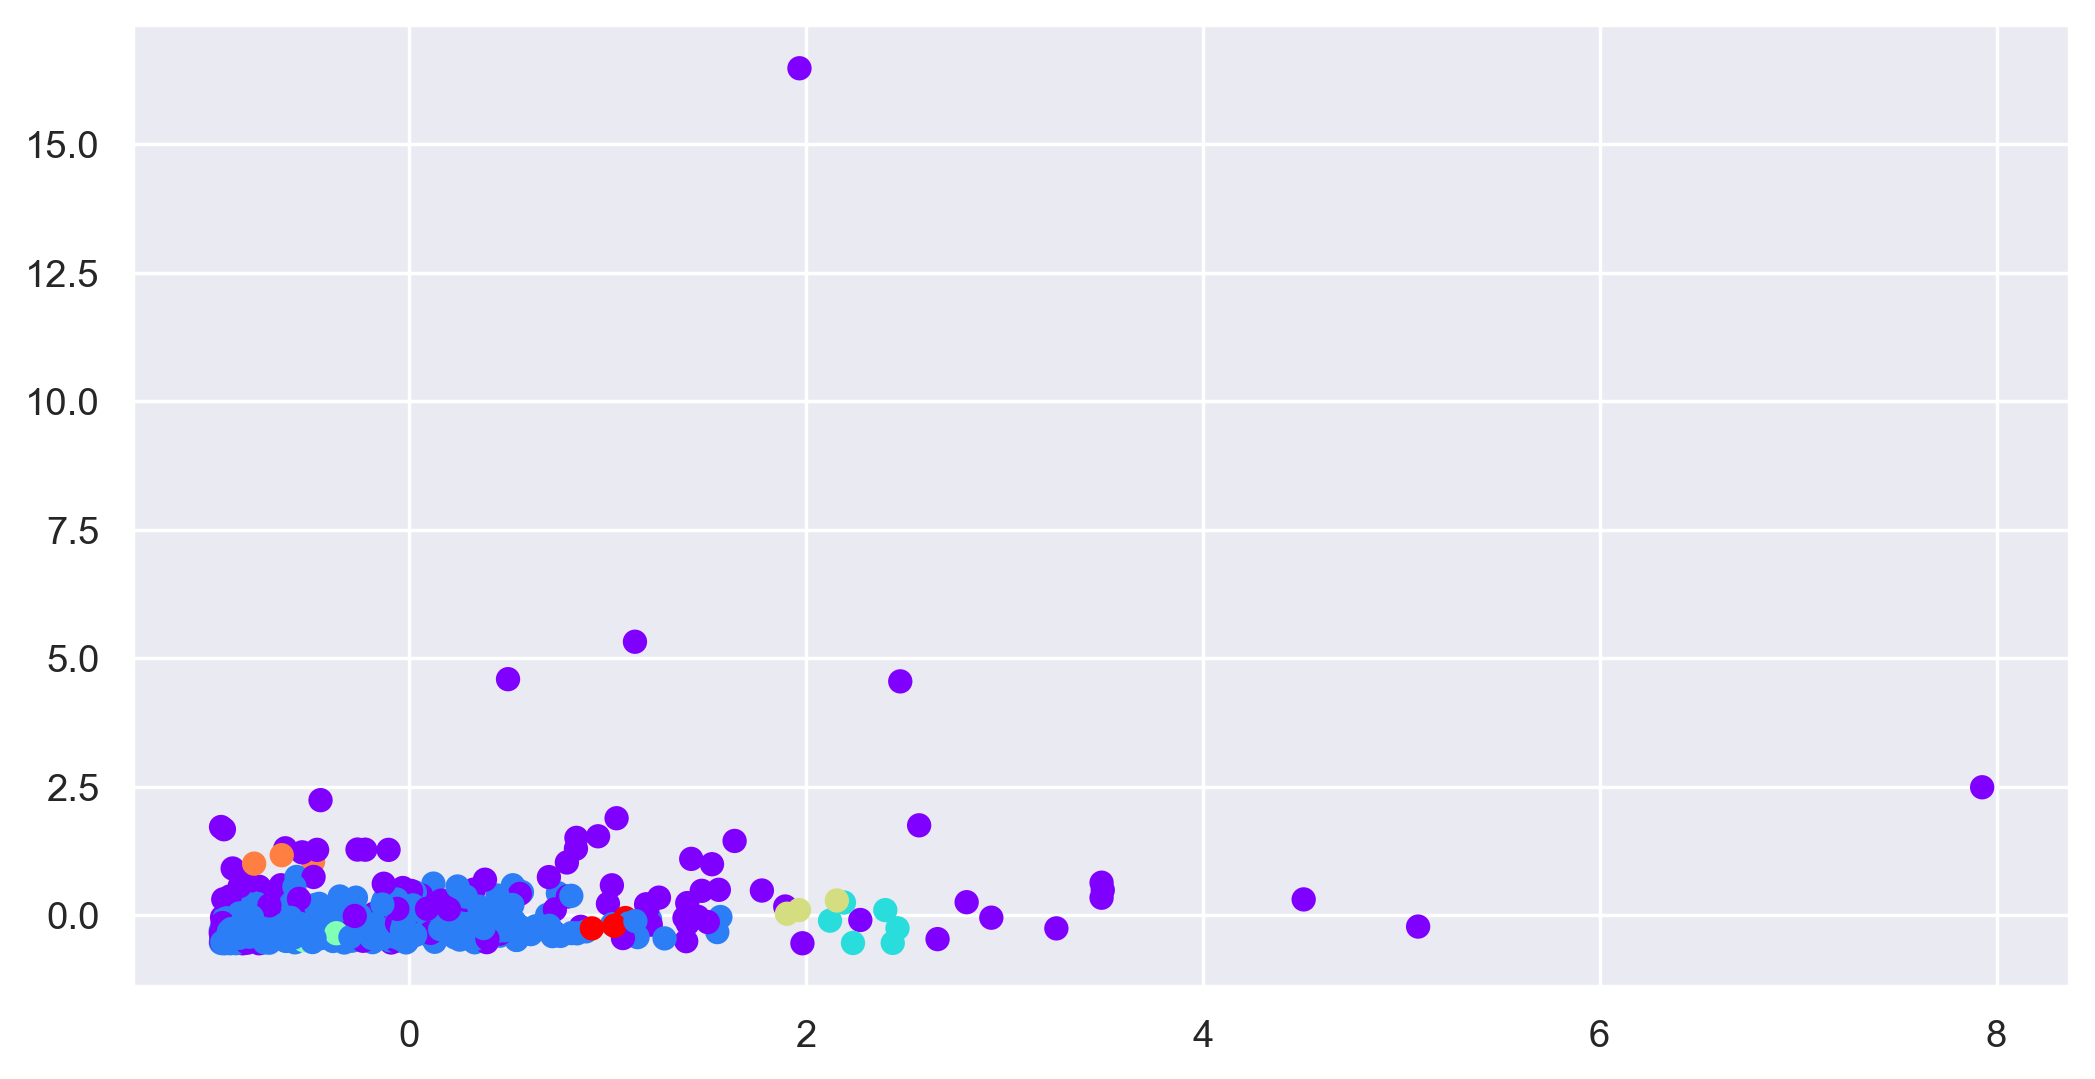

In [11]:
plt.scatter(x[:,0], x[:,5], c = y, cmap= 'rainbow')

In [12]:
from sklearn.metrics import silhouette_score

In [13]:
silhouette_score(x,y)

-0.07329671681468523

In [14]:
# The silhouette score of approximately -0.073 suggests that the clusters may have overlapping boundaries or are poorly formed. 
# Negative silhouette scores typically indicate that the clusters are not well-separated, and the data points might be closer to neighboring 
# clusters rather than their own assigned cluster

#### Hyperparameter Tuning 
Parameter which causes change in accuracy of the Model (Increase or Decrease) are known as Hyperparameter

##### Selecting Min_samples:
1. Number of columns + 1
2. Number of columns * 2
3. Always keep min_sample at least 3.

##### Finding out the best eps value(K-dist Plot)
- This technique calculates the average distance between each point and its k nearest neighbors, where k is the MinPts value you selected.
- The average k-distances are then plotted in ascending order on a k-distance graph. You’ll find the optimal value for ε at the point of maximum curvature (i.e. where the graph has the greatest slope).

In [15]:
from sklearn.neighbors import NearestNeighbors

In [16]:
ne = NearestNeighbors(n_neighbors=3).fit(x)
# Calculate the distance of every single data point eith their three nearest neighbors

In [17]:
# Whatever calculation that have done by (ne) it will select only 3 nearest neighbors from all the data point (here 440 dp) 
# Below code will return the Avg Distance and Index Number
d, index = ne.kneighbors(x)

In [18]:
d

array([[0.        , 0.46098501, 0.49746796],
       [0.        , 0.34363739, 0.43048153],
       [0.        , 1.14424502, 1.2507466 ],
       ...,
       [0.        , 0.81088341, 1.05002533],
       [0.        , 0.30388049, 0.31430896],
       [0.        , 0.1811683 , 0.24002891]])

In [19]:
index

array([[  0,   5, 281],
       [  1, 244,  82],
       [  2, 218, 409],
       ...,
       [437,  77, 163],
       [438, 212, 429],
       [439,  34, 299]], dtype=int64)

In [20]:
distance = np.sort(d[:,1])
distance

array([ 0.04438185,  0.04438185,  0.05323769,  0.05323769,  0.05967886,
        0.05967886,  0.06628148,  0.06628148,  0.07562688,  0.07562688,
        0.0906001 ,  0.0906001 ,  0.09573517,  0.09573517,  0.09708669,
        0.09708669,  0.09820424,  0.1138444 ,  0.1138444 ,  0.11524265,
        0.12722269,  0.12765414,  0.12765414,  0.13150813,  0.13150813,
        0.13419437,  0.13419437,  0.13861662,  0.13861662,  0.1417839 ,
        0.14276283,  0.14276283,  0.14585635,  0.15148845,  0.15148845,
        0.15208043,  0.15208043,  0.15230804,  0.15230804,  0.15392478,
        0.15392478,  0.15504455,  0.15504455,  0.15678346,  0.15678346,
        0.15682751,  0.15707717,  0.15707717,  0.15738395,  0.16092861,
        0.16095334,  0.16095334,  0.16251017,  0.16525716,  0.16525716,
        0.16645012,  0.16752299,  0.16869486,  0.16970611,  0.17213295,
        0.17237405,  0.17237405,  0.17322549,  0.17322549,  0.17753441,
        0.17770256,  0.17770256,  0.17835467,  0.17889164,  0.18

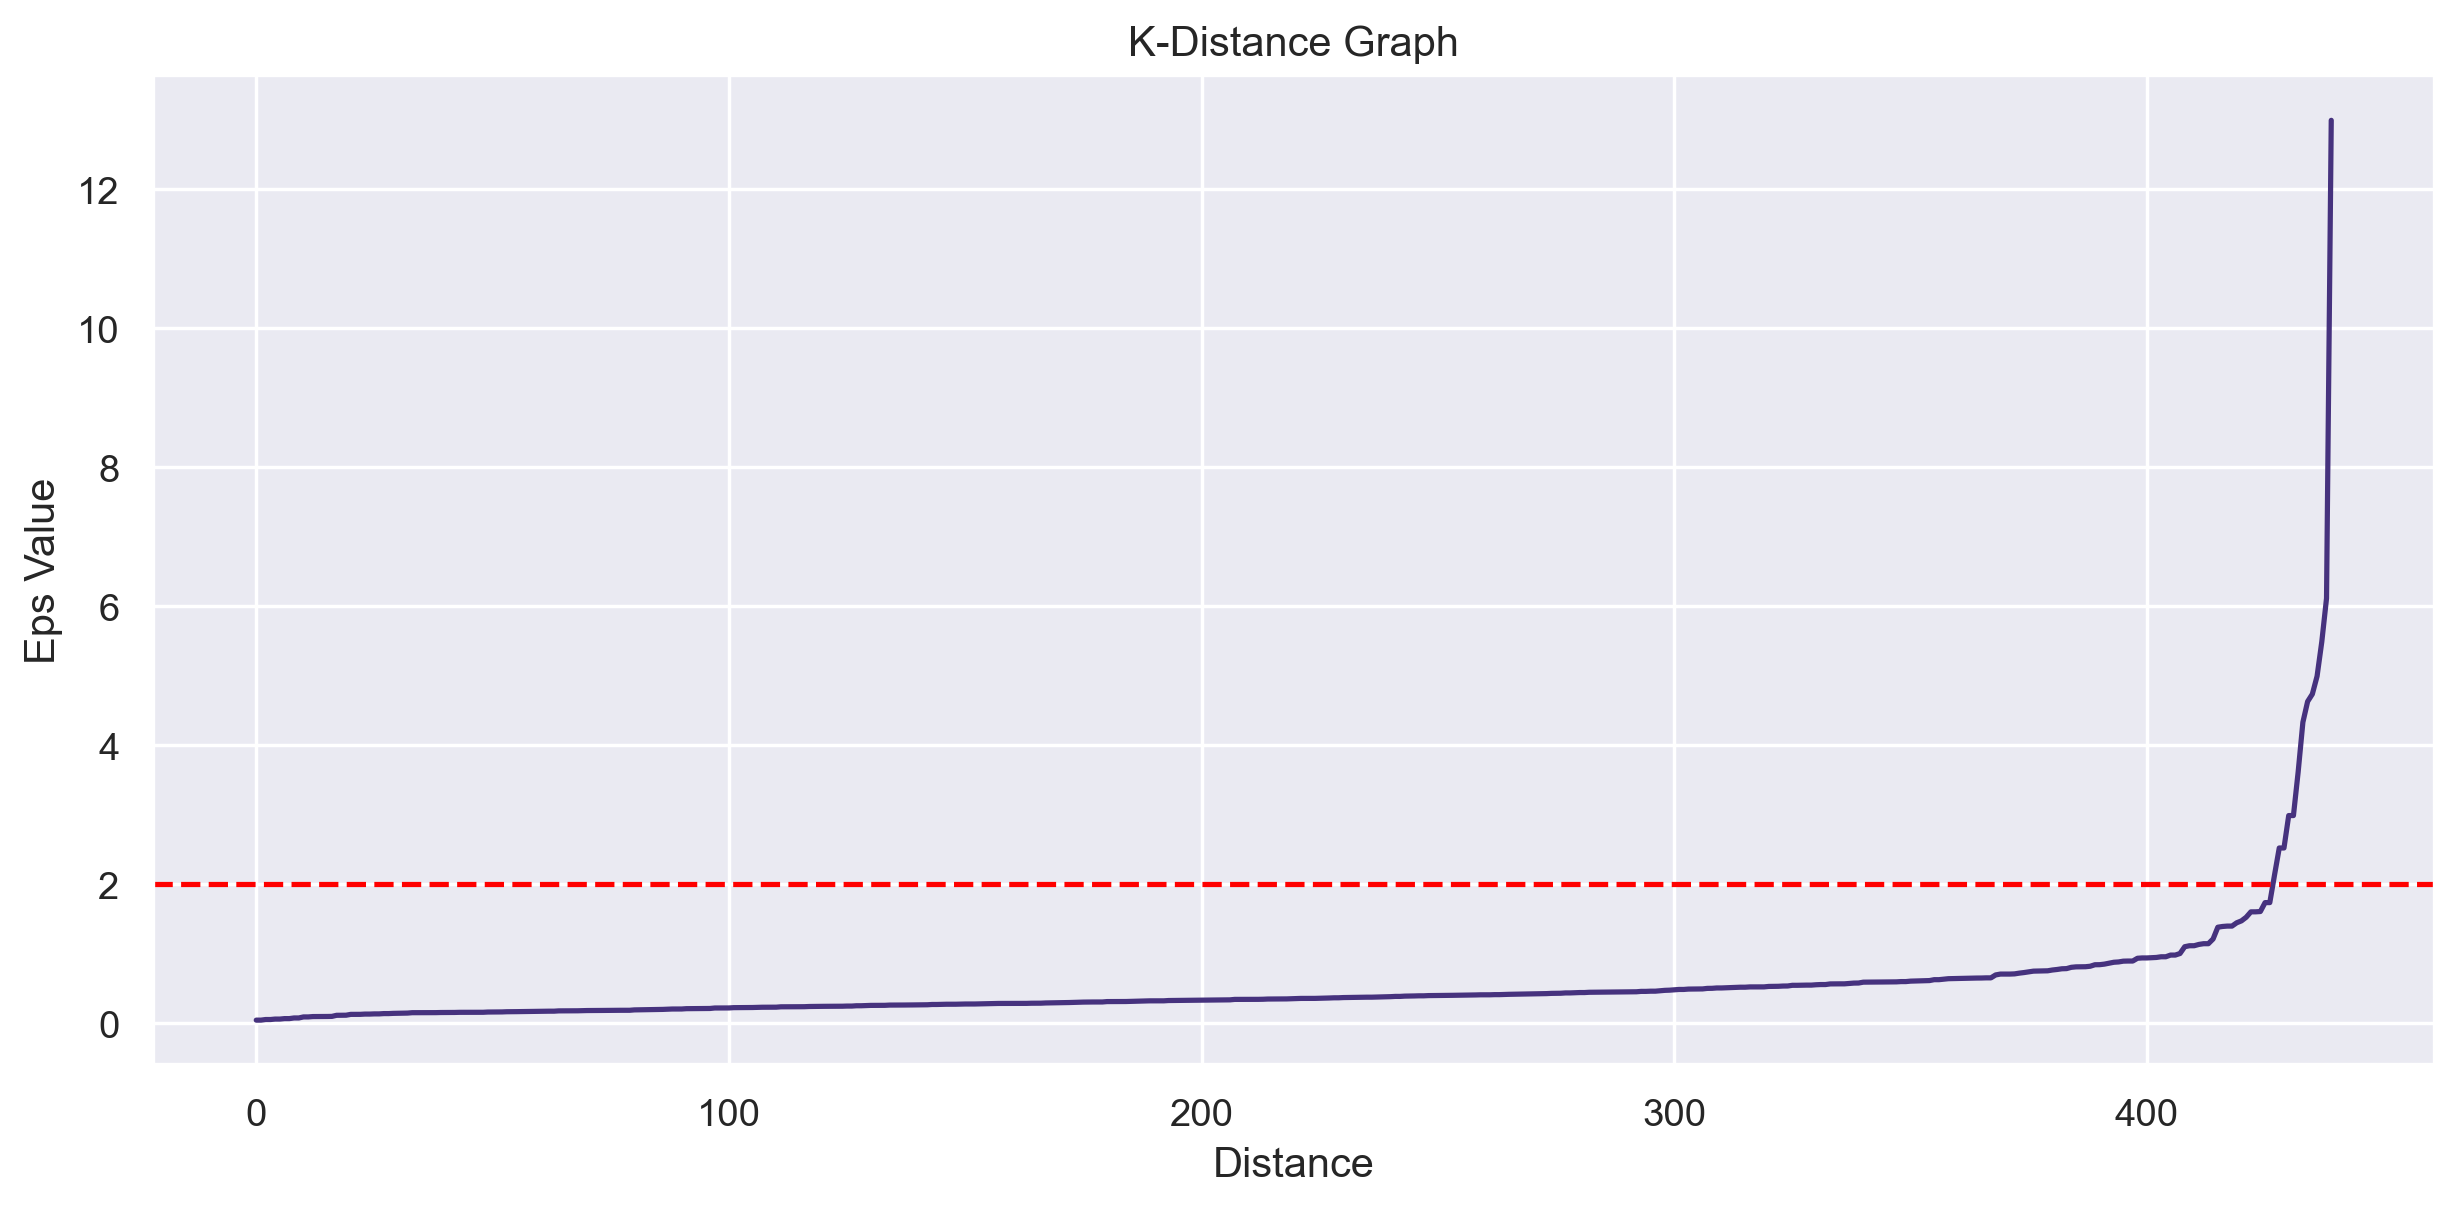

In [21]:
plt.plot(distance)
plt.axhline(y=2, color = 'red', linestyle = '--')
plt.xlabel('Distance')
plt.ylabel('Eps Value')
plt.title('K-Distance Graph')
plt.tight_layout()

#### Final Model

In [22]:
# Now we will select Eps Value = 2

In [23]:
db = DBSCAN(eps=2,min_samples=3)
yp = db.fit_predict(x)
yp

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0,
        0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1, -1, -1,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [24]:
np.unique(yp, return_counts=True)

(array([-1,  0], dtype=int64), array([ 13, 427], dtype=int64))

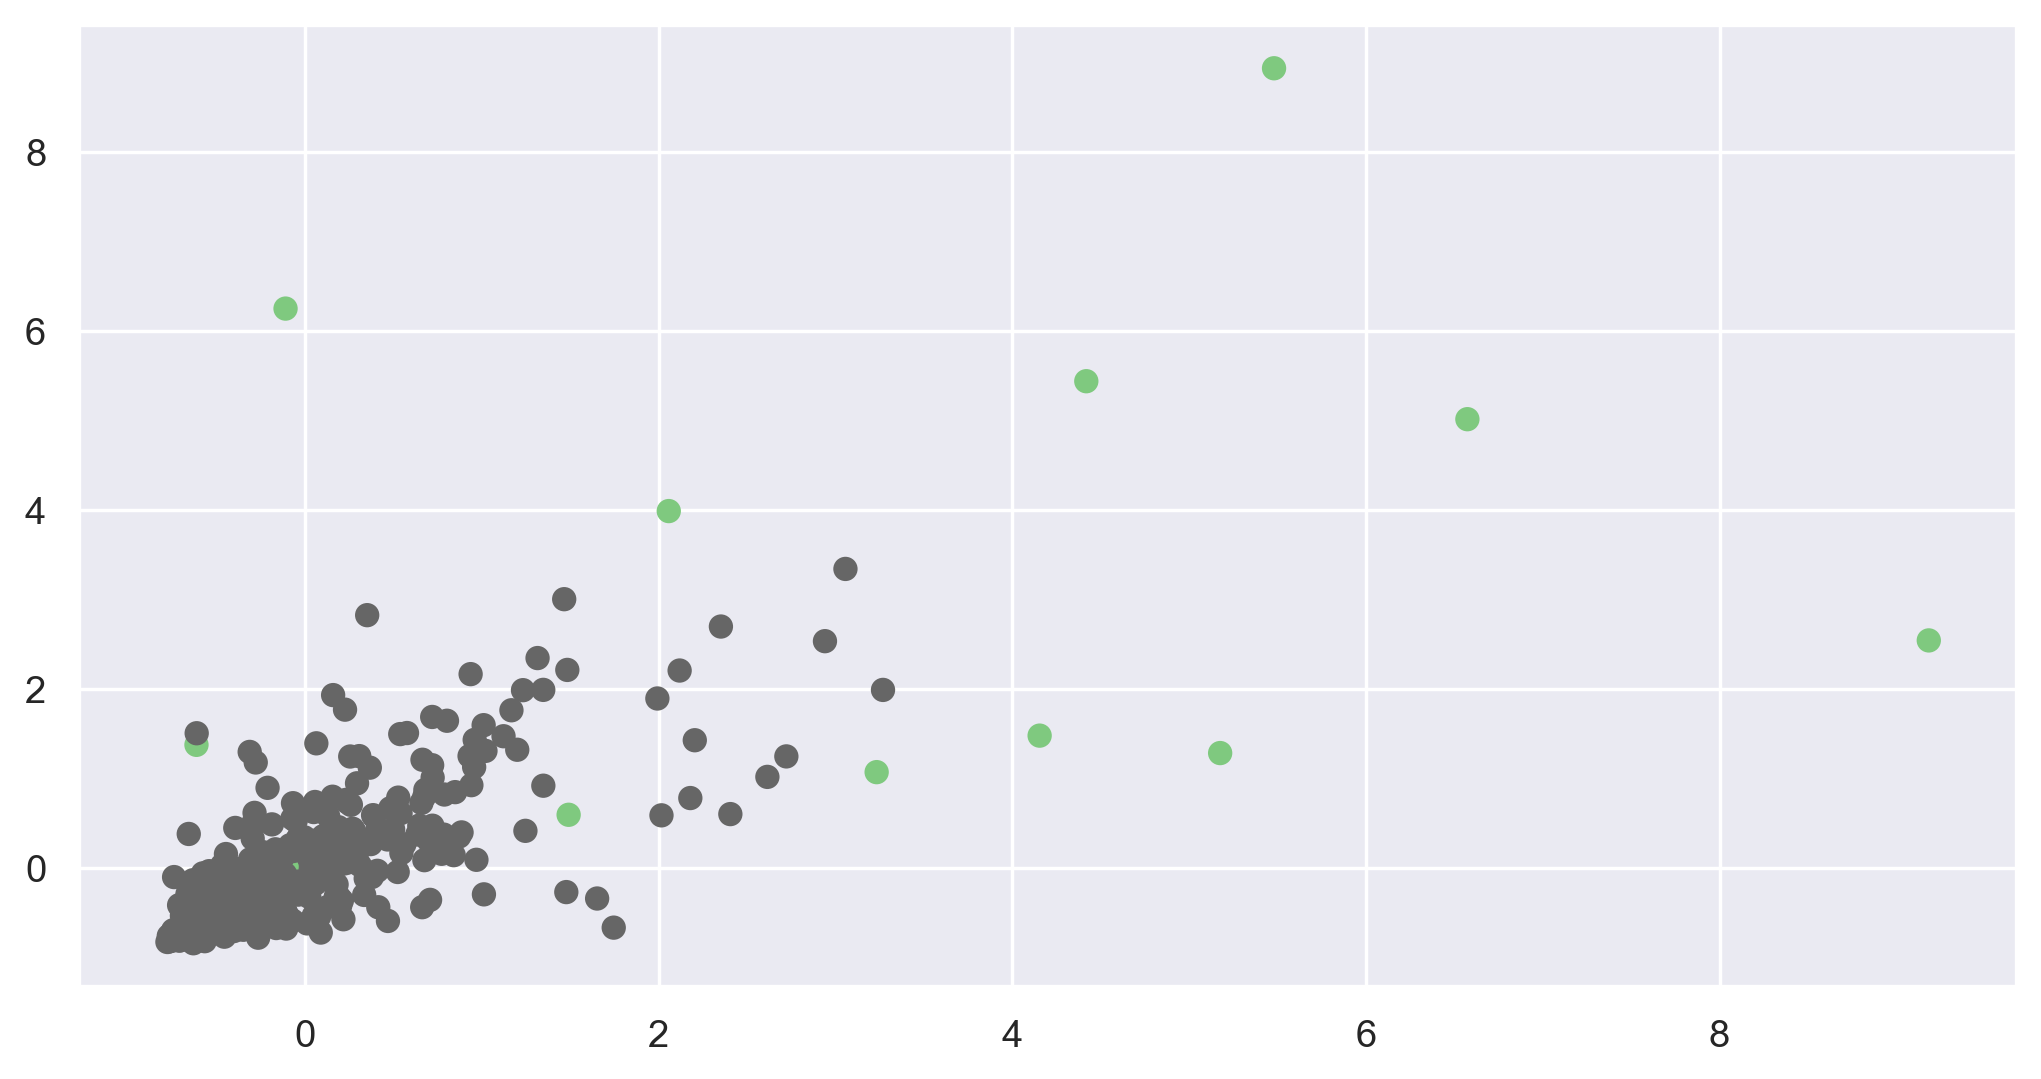

In [25]:
plt.scatter(x[:,1], x[:,2], c = yp, cmap='Accent')

In [26]:
silhouette_score(x, yp)

0.7486988127438182

In [27]:
# Silhouette score of approximately 0.75 is quite good, as it is closer to +1. 
# It indicates that the clusters are well-separated and the data points within each cluster are relatively close to each other 
# compared to points in other clusters.

In [28]:
# Analyze the clusters
df['Cluster'] = yp
df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,12669,9656,7561,214,2674,1338,0
1,7057,9810,9568,1762,3293,1776,0
2,6353,8808,7684,2405,3516,7844,0
3,13265,1196,4221,6404,507,1788,0
4,22615,5410,7198,3915,1777,5185,0
...,...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204,0
436,39228,1431,764,4510,93,2346,0
437,14531,15488,30243,437,14841,1867,0
438,10290,1981,2232,1038,168,2125,0


In [29]:
df[df['Cluster'] == 0] # 1 Cluster

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,12669,9656,7561,214,2674,1338,0
1,7057,9810,9568,1762,3293,1776,0
2,6353,8808,7684,2405,3516,7844,0
3,13265,1196,4221,6404,507,1788,0
4,22615,5410,7198,3915,1777,5185,0
...,...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204,0
436,39228,1431,764,4510,93,2346,0
437,14531,15488,30243,437,14841,1867,0
438,10290,1981,2232,1038,168,2125,0


In [30]:
df[df['Cluster'] == -1] # Outliers

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
23,26373,36423,22019,5154,4337,16523,-1
47,44466,54259,55571,7782,24171,6465,-1
61,35942,38369,59598,3254,26701,2017,-1
65,85,20959,45828,36,24231,1423,-1
71,18291,1266,21042,5373,4173,14472,-1
85,16117,46197,92780,1026,40827,2944,-1
86,22925,73498,32114,987,20070,903,-1
87,43265,5025,8117,6312,1579,14351,-1
93,11314,3090,2062,35009,71,2698,-1
181,112151,29627,18148,16745,4948,8550,-1


In [31]:
df.groupby('Cluster').agg('mean')

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Cluster,,,,,,
-1,31466.000000,28802.076923,35259.461538,13785.538462,14670.846154,9624.076923
0,11407.665105,5095.854801,7119.880562,2745.756440,2522.566745,1278.290398
